In [3]:
import os
import sqlite3
import pandas as pd
from pathlib import Path
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import pickle
from import_data import import_training_data
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels as sm


In [4]:
#format training data
df = import_training_data()
labels = df.pop('finalLapTime')
names = df.columns
X_train, x_test, Y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)


In [5]:
df.head()

,lastLapTime,currentLapTime,currentLapNum,lapDistance,carPosition,worldPositionX,worldPositionY,worldPositionZ,worldVelocityX,worldVelocityY,...,summed_tyresSurfaceTemperatureRL,summed_tyresSurfaceTemperatureRR,summed_tyresSurfaceTemperatureFL,summed_tyresSurfaceTemperatureFR,summed_engineTemperature,summed_tyresWearRL,summed_tyresWearRR,summed_tyresWearFL,summed_tyresWearFR,summed_carPosition
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,1.0,34.462864,13.0,-540.381836,-10.097237,438.029877,0.001523,-0.000587,...,84,84,89,89,88,0,0,0,0,13
1,0.0,0.0,1.0,34.462864,13.0,-540.381836,-10.097237,438.029877,0.001523,-0.000587,...,168,168,178,178,176,0,0,0,0,26
2,0.0,0.0,1.0,34.462864,13.0,-540.381836,-10.097237,438.029877,0.001523,-0.000587,...,252,252,267,267,264,0,0,0,0,39
3,0.0,0.0,1.0,34.462864,13.0,-540.381836,-10.097237,438.029877,0.001523,-0.000587,...,336,336,356,356,352,0,0,0,0,52
4,0.0,0.0,1.0,34.462864,13.0,-540.381836,-10.097237,438.029877,0.001523,-0.000587,...,420,420,445,445,440,0,0,0,0,65


Mean average error of untuned model 1.20398613752203
----------------------------------------------------------------------------------------------------
Heatmap of variable correlations


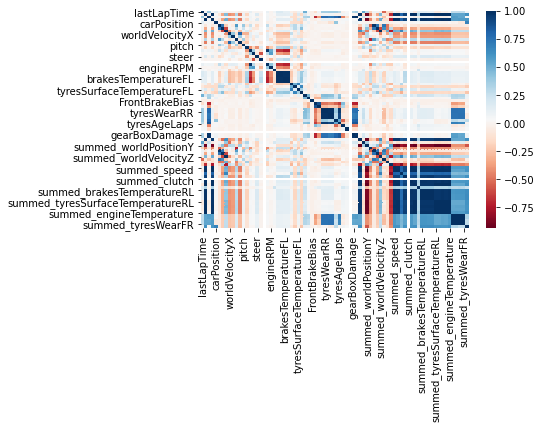

In [6]:
model1 = LinearRegression()
model1.fit(X_train, Y_train)
pred1 = model1.predict(x_test)
coefs = model1.coef_
beta_coefficients = {key:value for (key,value) in zip(names,coefs)}
sorted_beta_coefficients = dict(sorted(beta_coefficients.items(), key=lambda item: item[1]))
correlations = df.corr()
sns.heatmap(correlations, cmap='RdBu')
print(f'Mean average error of untuned model {mae(y_test, pred1)}')
print('-'*100)
print('Heatmap of variable correlations')
plt.show()

In [7]:
#Inspecting variable inflation factor
x1 = add_constant(df)
vif1 = pd.DataFrame()
vif = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1['VIF'] = vif
vif1['variable'] = x1.columns
vif2 = vif1.T
pd.options.display.max_columns= None
display(vif2)

/home/rufus/miniconda3/envs/tensorflow/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/rufus/miniconda3/envs/tensorflow/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
VIF,0.0,23.318751,2618.697329,114.644938,3358.346891,8.975383,93.360133,140.880919,169.829653,9.381625,2.163425,6.543717,4.018218,1.730327,2.668096,77.322835,2.520548,2.152203,1.936035,NaN,59.128722,3.441572,1.274484,285347.168028,286418.303279,158542.550638,159490.139526,20.699226,17.547055,16.817654,16.460618,5.253254,2.01206,1.044238,35.314551,23.78894,624.083196,519.2859,683.076768,633.240971,24.434019,91.550124,4.079525,1.568756,NaN,36.082421,59.721013,288.517105,62.45492,1064.922484,114.317476,142.730316,134.810343,174.018426,57.275757,6.56263,30.235373,18955.381458,580.204344,26.869535,44.026709,NaN,10358.304404,6506.150598,2.345626,12077339.207729,11913542.180732,4215789.195593,4181244.579936,35843.073934,33525.411988,6025.527411,7574.240062,989.960056,7936.202417,7439.205011,3940.814547,4223.625186,12.913909
variable,const,lastLapTime,currentLapTime,currentLapNum,lapDistance,carPosition,worldPositionX,worldPositionY,worldPositionZ,worldVelocityX,worldVelocityY,worldVelocityZ,yaw,pitch,roll,speed,throttle,steer,brake,clutch,gear,engineRPM,drs,brakesTemperatureRL,brakesTemperatureRR,brakesTemperatureFL,brakesTemperatureFR,tyresSurfaceTemperatureRL,tyresSurfaceTemperatureRR,tyresSurfaceTemperatureFL,tyresSurfaceTemperatureFR,engineTemperature,fuelMix,FrontBrakeBias,fuelInTank,fuelRemainingLaps,tyresWearRL,tyresWearRR,tyresWearFL,tyresWearFR,actualTyreCompound,tyresAgeLaps,frontLeftWingDamage,frontRightWingDamage,rearWingDamage,gearBoxDamage,engineDamage,summed_currentLapTime,summed_worldPositionX,summed_worldPositionY,summed_worldPositionZ,summed_worldVelocityX,summed_worldVelocityY,summed_worldVelocityZ,summed_yaw,summed_pitch,summed_roll,summed_speed,summed_throttle,summed_steer,summed_brake,summed_clutch,summed_gear,summed_engineRPM,summed_drs,summed_brakesTemperatureRL,summed_brakesTemperatureRR,summed_brakesTemperatureFL,summed_brakesTemperatureFR,summed_tyresSurfaceTemperatureRL,summed_tyresSurfaceTemperatureRR,summed_tyresSurfaceTemperatureFL,summed_tyresSurfaceTemperatureFR,summed_engineTemperature,summed_tyresWearRL,summed_tyresWearRR,summed_tyresWearFL,summed_tyresWearFR,summed_carPosition


In [8]:
#Dropping variables with high VIF

vars_to_drop = ['lastLapTime','currentLapNum','lapDistance',
                'speed', 'clutch', 'gear', 'brakesTemperatureRL', 
                'brakesTemperatureFL', 'tyresWearRL', 'tyresWearFR',
                'tyresAgeLaps', 'rearWingDamage',]
summed_drop = [name for name in x1.columns if name.startswith('summed')]
vars_to_drop += summed_drop
print(vars_to_drop)

['lastLapTime', 'currentLapNum', 'lapDistance', 'speed', 'clutch', 'gear', 'brakesTemperatureRL', 'brakesTemperatureFL', 'tyresWearRL', 'tyresWearFR', 'tyresAgeLaps', 'rearWingDamage', 'summed_currentLapTime', 'summed_worldPositionX', 'summed_worldPositionY', 'summed_worldPositionZ', 'summed_worldVelocityX', 'summed_worldVelocityY', 'summed_worldVelocityZ', 'summed_yaw', 'summed_pitch', 'summed_roll', 'summed_speed', 'summed_throttle', 'summed_steer', 'summed_brake', 'summed_clutch', 'summed_gear', 'summed_engineRPM', 'summed_drs', 'summed_brakesTemperatureRL', 'summed_brakesTemperatureRR', 'summed_brakesTemperatureFL', 'summed_brakesTemperatureFR', 'summed_tyresSurfaceTemperatureRL', 'summed_tyresSurfaceTemperatureRR', 'summed_tyresSurfaceTemperatureFL', 'summed_tyresSurfaceTemperatureFR', 'summed_engineTemperature', 'summed_tyresWearRL', 'summed_tyresWearRR', 'summed_tyresWearFL', 'summed_tyresWearFR', 'summed_carPosition']


In [9]:
#Looking at new VIF values after removing highly correlated variables

df2 = df.drop(vars_to_drop, axis=1)
x2 = add_constant(df2)
vif3 = pd.DataFrame()
vif = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif3['VIF'] = vif
vif3['variable'] = x2.columns
vif4 = vif3.T
pd.options.display.max_columns= None
display(vif4)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
VIF,7246600.729547,3.057172,3.471981,6.65678,9.210781,4.352655,4.676396,1.742177,2.6319,3.708399,1.515932,2.356625,2.369072,1.581855,1.663969,1.817641,1.182316,90.013726,92.768,14.757327,12.766698,11.317508,10.958277,2.516189,1.71189,1.02091,25.642171,16.126575,112.559261,100.573038,13.295156,2.227592,1.207663,22.308626,31.010108
variable,const,currentLapTime,carPosition,worldPositionX,worldPositionY,worldPositionZ,worldVelocityX,worldVelocityY,worldVelocityZ,yaw,pitch,roll,throttle,steer,brake,engineRPM,drs,brakesTemperatureRR,brakesTemperatureFR,tyresSurfaceTemperatureRL,tyresSurfaceTemperatureRR,tyresSurfaceTemperatureFL,tyresSurfaceTemperatureFR,engineTemperature,fuelMix,FrontBrakeBias,fuelInTank,fuelRemainingLaps,tyresWearRR,tyresWearFL,actualTyreCompound,frontLeftWingDamage,frontRightWingDamage,gearBoxDamage,engineDamage


Mean average error of untuned model 2.195829605294293


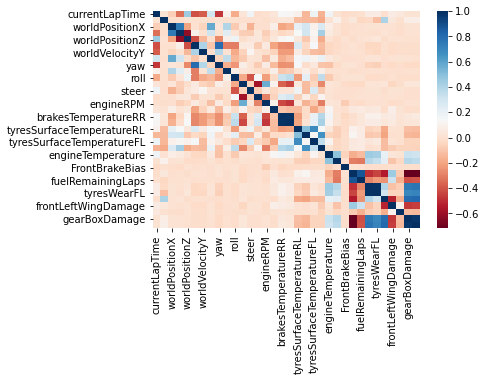

In [10]:
#training a new model with cleaned dataset

X_train, X_test, y_train, y_test = train_test_split(df2, labels, test_size=0.2, random_state=42)

new_model = LinearRegression()
new_model.fit(X_train, y_train)
pred = new_model.predict(X_test)
correlations_2 = df2.corr()
sns.heatmap(correlations_2, cmap='RdBu')
print(f'Mean average error of untuned model {mae(y_test, pred)}')

In [11]:
#exploring model 

intercept = new_model.intercept_
coef = new_model.coef_

print('Model intecept is {:.4}'.format(intercept))
print('-'*100)

for cf in zip(X_train.columns, coef):
    print('Coefficient for {} is {:.2}'.format(cf[0], cf[1]))


Model intecept is 118.1
----------------------------------------------------------------------------------------------------
Coefficient for currentLapTime is 0.036
Coefficient for carPosition is 0.11
Coefficient for worldPositionX is -0.0017
Coefficient for worldPositionY is 0.25
Coefficient for worldPositionZ is -0.00019
Coefficient for worldVelocityX is -0.0017
Coefficient for worldVelocityY is 0.31
Coefficient for worldVelocityZ is -0.0062
Coefficient for yaw is 0.2
Coefficient for pitch is 1.7
Coefficient for roll is 6.2
Coefficient for throttle is -0.24
Coefficient for steer is -0.048
Coefficient for brake is -0.75
Coefficient for engineRPM is -0.00022
Coefficient for drs is 2.0
Coefficient for brakesTemperatureRR is -0.0077
Coefficient for brakesTemperatureFR is 0.007
Coefficient for tyresSurfaceTemperatureRL is -0.073
Coefficient for tyresSurfaceTemperatureRR is 0.3
Coefficient for tyresSurfaceTemperatureFL is 0.045
Coefficient for tyresSurfaceTemperatureFR is -0.18
Coefficient

In [26]:
#Evaluating the model

x3 = add_constant(df2)

ols_model = sm.regression.linear_model.OLS(labels, x3)

est = ols_model.fit()

In [27]:
#heteroscedsticity test - not working and not sure why.. 

from statsmodels.stats import diagnostic as diag

diag.het_breuschpagan(est.resid, est.model.exog)

(66718.76908075734, 0.0, 2162.518431585963, 0.0)

/home/rufus/miniconda3/envs/tensorflow/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.0


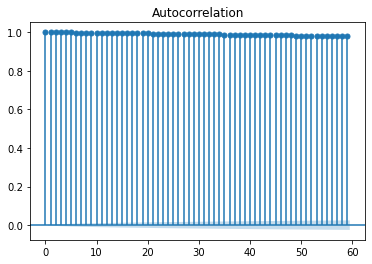

In [32]:
#autocorrelation test - again, giving a zero p-value.. 
#perhaps issue with the OLS model? 
#plots looking very weird


from statsmodels.graphics.tsaplots import plot_acf
lag = min(10, (len(df2)//5))

test_results = diag.acorr_ljungbox(est.resid, lags=lag)

ibvalue, p_val = test_results

print(min(p_val))

plot_acf(est.resid)
plt.show()

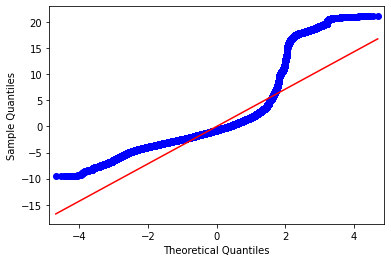

Mean of residuals is -2.006e-11


In [34]:
from statsmodels.graphics.gofplots import qqplot
import pylab

qqplot(est.resid, line='s')
pylab.show()

print('Mean of residuals is {:.4}'.format(sum(est.resid)/len(est.resid)))

We can clearly see data does not closely match centre line.

- Data is not normally distributed

However: 

- Mean of residuals is close to 0

Some thoughts:

- Some of the tests aren't really working, unsure as to whether this is because of errors in code or data is not suited to this method. 

- On the whole, the model results aren't that bad. 

- Strange that reducing the amount of collinearity reduces the accuracy of the model? Main reason I think this is is because I am removing my summed variables, as they naturally have huge collinearity with their non-summed counterparts. But this means that it does not capture much history of the lap? 

